# Tuning the parameters of a PID controller 
In this notebook you can test your intuition for how to adjust the parameters of a PID controller.

Start by watching [this excellent video](https://www.youtube.com/watch?v=XfAt6hNV8XM).


## Blockdiagram
We consider the model used in the video: Velocity control of a car. The plant model describes the change in velocity of the car to a change in position of the accelerator (the gas pedal). In addition to the signal from the accelerator influenceing the velocity, there is also unknown forces such as wind resistance and gravity when the car is going uphill or downhill. These forces are represented by a disturbance signal entering at the input to the system. 

<!--- ![Block diagram of cruise control system](cruise-control-pid-block.svg) -->
<img src="cruise-control-pid-block.svg" alt="Block diagram of cruise control system" width="900">

## The PID controller
The PID-controller is on so-called *parallel form*
\begin{equation}
F(s) = K_p + \frac{K_i}{s} + K_d s.
\end{equation}

## The closed-loop system from the reference signal to the output
The model is linear and hence the principle of superposition holds. This mean that we can look at the response to the reference signal and the response to the disturbance signal separately. Setting $$d=0$$, we get a closed-loop response given by
\begin{equation}
Y(s) = \frac{\frac{1}{s(s+1)}F(s)}{1 + \frac{1}{s(s+1)}F(s)}R(s).
\end{equation}

## The closed-loop system from disturbance to the output
Setting $$r=0$$, the reponse to the disturbance is given by 
\begin{equation}
Y(s) = \frac{\frac{1}{s(s + 1)}}{1 + \frac{1}{s(s+1)}F(s)}D(s)
\end{equation}

## The full closed-loop system
We can find the response to a combination of input signals $r$ and $d$ by summation:
\begin{equation}
Y(s) = \frac{\frac{1}{s(s+1)}F(s)}{1 + \frac{1}{s(s+1)}F(s)}R(s) + \frac{\frac{1}{s(s + 1)}}{1 + \frac{1}{s(s+1)}F(s)}D(s)
\end{equation}



In [33]:
# Uncomment and run the lines in this cell, if you are missing some of the packages
# This needs only be done once. After adding the packages you may have to restart the kernel to make
# things work. Or close (File->Close and Halt) and reopen the notebook. 
#Pkg.add("Interact")
#Pkg.add("Gadfly")
#Pkg.add("ControlSystems")
#Pkg.update()

In [34]:
using Interact
using ControlSystems
using Gadfly

## Step response
Below you can manipulate the $K_p$, $K_i$ and $K_d$ parameters of the PID-controller, and see a time-response of the system. At time $t=1$ there is a unit step in the reference signal, and at time $t=5$ yhere is a negative step in the disturbance signal. Note that since we scaled time using the time constant of the system, the time is not measured in seconds but in the length of time constant. So to get $t=5$ in seconds you will have to multiply 
\begin{equation}
t = 5 T = 5 \frac{1}{\omega}
\end{equation}
where $\omega$ has unit $1/s$ or $Hz$. 

Interact.Slider{Float64}(Signal{Float64}(10.0, nactions=0),"Kp",10.0,0.0:0.2:20.0,true)

Interact.Slider{Float64}(Signal{Float64}(5.0, nactions=0),"Ki",5.0,0.0:0.2:10.0,true)

Interact.Slider{Float64}(Signal{Float64}(5.0, nactions=0),"Kd",5.0,0.0:0.2:10.0,true)

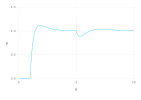

In [57]:
G1 = tf([1.], [1, 1.]);
Gint = tf([1], [1, 0]);
G = G1*Gint;
#print(G)
N = 600;
t = collect(linspace(0, 10, N)); # 60 values per second 

# The reference signal
r = zeros(N);
r[round(Int,N/10):end] = 1.0;

# The disturbance signal
d = zeros(N);
d[round(Int,N/10)*5:end] = -1.0;

@manipulate for Kp in 0:0.2:20, Ki in 0:0.2:10, Kd in 0:0.2:10
    F = minreal(tf([Kd, Kp, Ki], [1.0, 0]));
    Gr = minreal(feedback(G*F));
    Gd = minreal(feedback(G*F)/Gint/F);
    yr, t_out, x = lsim(Gr, r, t);
    yd, t_out, x = lsim(Gd, d, t);
    stp = plot(x=t, y=(yr+yd), Geom.line)
end

### Exercise
Try to find a setting that gives about 20% overshoot and a settling time of about 6 seconds

## Relevant notebooks
[Sampling of a sinusoid](../../discrete-time-systems/notebooks/Aliasing.ipynb)
## Further reading
- [Documentation for the ControlSystem package](http://juliacontrol.github.io/ControlSystems.jl/latest/)
- [PID control on Wikipedia](https://en.wikipedia.org/wiki/PID_controller)


In [52]:
H = tf([1], [1, 0])

TransferFunction:
1.0
---
 s

Continuous-time transfer function model

In [53]:
H/H

TransferFunction:
s
-
s

Continuous-time transfer function model

In [47]:
minreal(feedback(H))

TransferFunction:
  1.0
-------
s + 1.0

Continuous-time transfer function model

In [50]:
minreal(feedback(H, tf([100],[1])))

TransferFunction:
  100.0
---------
s + 100.0

Continuous-time transfer function model

In [49]:
feedback(100*H)

TransferFunction:
   100.0s
------------
s^2 + 100.0s

Continuous-time transfer function model

In [56]:
int(10/3)

 in depwarn at ./deprecated.jl:73
while loading In[56], in expression starting on line 1


3